In [49]:
# In[1]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import re
import numpy as np

# ============================== ALL STATISTICS ===============================
# **Date and time of benchmark run: Tue Apr 30 18:38:49 2024
# **Sizeof: char:1 short:2 int:4 long:8 u8:1 u16:2 u32:4 int32:4
# **System used for compilation:
# **Linux public-Super-Server 6.5.0-rc2-snp-host-ec25de0e7141 #2 SMP PREEMPT_DYNAM
# **C compiler: musl-gcc
# **libc: 
# **Date of compilation: 2024年 04月 30日 星期二 15:59:41 CST
# =============================================================================
# ==========================ORIGINAL BYTEMARK RESULTS==========================
# INTEGER INDEX       : 75.017
# FLOATING-POINT INDEX: 72.508
# Baseline (MSDOS*)   : Pentium* 90, 256 KB L2-cache, Watcom* compiler 10.0
# ==============================LINUX DATA BELOW===============================
# CPU                 : 64 CPU AuthenticAMD AMD EPYC-v4 Processor 2800MHz
# L2 Cache            : 512 KB
# OS                  : Linux 6.5.0-snp-guest-525dfdeadc3a
# C compiler          : musl-gcc
# libc                : 
# MEMORY INDEX        : 18.072
# INTEGER INDEX       : 19.220
# FLOATING-POINT INDEX: 40.216
# Baseline (LINUX)    : AMD K6/233*, 512 KB L2-cache, gcc 2.7.2.3, libc-5.4.38
# * Trademarks are property of their respective holder.

# Table content
table_content0 = """
BYTEmark* Native Mode Benchmark ver. 2 (10/95)
Index-split by Andrew D. Balsa (11/97)
Linux/Unix* port by Uwe F. Mayer (12/96,11/97)

TEST                : Iterations/sec.  : Old Index   : New Index
                    :                  : Pentium 90* : AMD K6/233*
--------------------:------------------:-------------:------------
NUMERIC SORT        :          1123.5  :      28.81  :       9.46
STRING SORT         :          205.82  :      91.97  :      14.23
BITFIELD            :      4.8808e+08  :      83.72  :      17.49
FP EMULATION        :           93.03  :      44.64  :      10.30
FOURIER             :      1.6447e+05  :     187.05  :     105.06
ASSIGNMENT          :          24.024  :      91.42  :      23.71
IDEA                :           11438  :     174.94  :      51.94
HUFFMAN             :          3044.2  :      84.41  :      26.96
NEURAL NET          :          30.474  :      48.95  :      20.59
LU DECOMPOSITION    :          803.71  :      41.64  :      30.07
"""

# define CONFIG_VMPL_PAGE_GROW_SIZE 0x200
table_content1 = """
BYTEmark* Native Mode Benchmark ver. 2 (10/95)
Index-split by Andrew D. Balsa (11/97)
Linux/Unix* port by Uwe F. Mayer (12/96,11/97)

TEST                : Iterations/sec.  : Old Index   : New Index
                    :                  : Pentium 90* : AMD K6/233*
--------------------:------------------:-------------:------------
NUMERIC SORT        :          1078.2  :      27.65  :       9.08
STRING SORT         :          193.21  :      86.33  :      13.36
BITFIELD            :      4.8275e+08  :      82.81  :      17.30
FP EMULATION        :          90.883  :      43.61  :      10.06
FOURIER             :      1.5759e+05  :     179.22  :     100.66
ASSIGNMENT          :          23.318  :      88.73  :      23.01
IDEA                :           10927  :     167.12  :      49.62
HUFFMAN             :            2902  :      80.47  :      25.70
NEURAL NET          :          31.506  :      50.61  :      21.29
LU DECOMPOSITION    :          798.41  :      41.36  :      29.87
"""

#define CONFIG_VMPL_PAGE_GROW_SIZE 0x400
table_content2 = """
BYTEmark* Native Mode Benchmark ver. 2 (10/95)
Index-split by Andrew D. Balsa (11/97)
Linux/Unix* port by Uwe F. Mayer (12/96,11/97)

TEST                : Iterations/sec.  : Old Index   : New Index
                    :                  : Pentium 90* : AMD K6/233*
--------------------:------------------:-------------:------------
NUMERIC SORT        :          1063.7  :      27.28  :       8.96
STRING SORT         :          195.76  :      87.47  :      13.54
BITFIELD            :      4.8275e+08  :      82.81  :      17.30
FP EMULATION        :          92.262  :      44.27  :      10.22
FOURIER             :      1.6358e+05  :     186.04  :     104.49
ASSIGNMENT          :          23.564  :      89.67  :      23.26
IDEA                :           11302  :     172.86  :      51.32
HUFFMAN             :          3125.7  :      86.68  :      27.68
NEURAL NET          :          31.506  :      50.61  :      21.29
LU DECOMPOSITION    :          798.41  :      41.36  :      29.87
"""

# Read the table from the string
df0 = pd.read_table(io.StringIO(table_content0), delimiter=':', skiprows=7, engine='python')
df1 = pd.read_table(io.StringIO(table_content1), delimiter=':', skiprows=7, engine='python')
df2 = pd.read_table(io.StringIO(table_content2), delimiter=':', skiprows=7, engine='python')

# Drop footer
df0 = df0.dropna()
df1 = df1.dropna()
df2 = df2.dropna()

columns = ['TEST', 'Iterations/sec.', 'Old Index', 'New Index']
df0.columns = columns
df1.columns = columns
df2.columns = columns

df0 = df0.drop(columns=['Old Index', 'New Index'])
df1 = df1.drop(columns=['Old Index', 'New Index'])
df2 = df2.drop(columns=['Old Index', 'New Index'])

df0.set_index('TEST')
df1.set_index('TEST')
df2.set_index('TEST')

df0.to_csv('nbench-syscall.csv', sep=',')
df1.to_csv('nbench-ghcb-512.csv', sep=',')
df2.to_csv('nbench-ghcb-1024.csv', sep=',')

In [50]:
# Merge the three dataframes by the first column
df = pd.merge(df0, df1, on='TEST')
df = pd.merge(df, df2, on='TEST')

# Rename the columns to remove the index
df.columns = ['TEST', 'Normal', 'GHCB', 'GHCB2']
# Calculate the difference between the two columns
# df['Difference'] = df['Normal'] - df['GHCB']
# Calculate the percentage difference
# df['Percentage'] = (df['Difference'] / df['Normal']) * 100
# Save as a CSV file
df.to_csv('nbench-1024.csv', index=False)

# Drop 2/8/9 rows
df = df.drop([2, 8, 9])

# Normalize the data, Normal as baseline, GHCB as value
df['GHCB'] = df['GHCB'] / df['Normal']
df['GHCB2'] = df['GHCB2'] / df['Normal']
df['Normal'] = 1

# Display the dataframe
display(df)

# Colors
colors = plt.get_cmap("Blues")


,TEST,Normal,GHCB,GHCB2
0,NUMERIC SORT,1,0.959680,0.946773
1,STRING SORT,1,0.938733,0.951122
3,FP EMULATION,1,0.976921,0.991745
4,FOURIER,1,0.958169,0.994589
5,ASSIGNMENT,1,0.970613,0.980852
6,IDEA,1,0.955324,0.988110
7,HUFFMAN,1,0.953288,1.026772


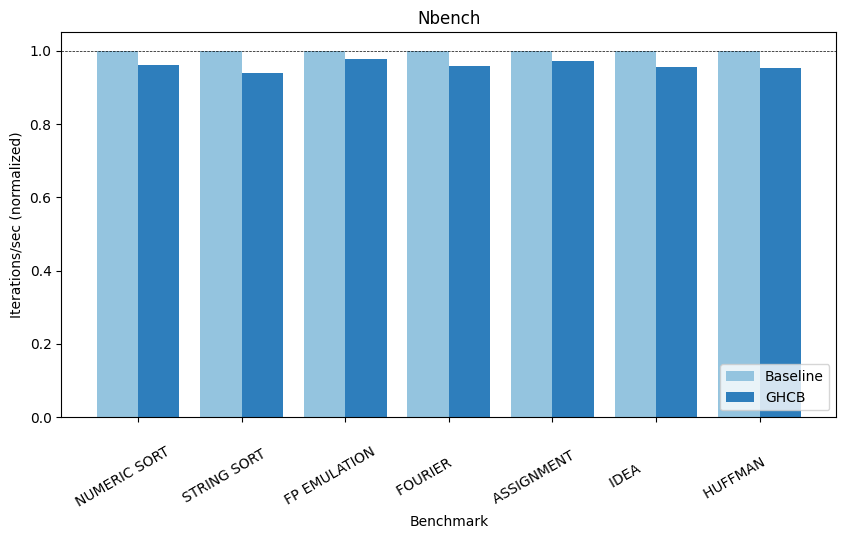

<Figure size 640x480 with 0 Axes>

In [25]:
Ygirls = df['Normal']
Zboys = df['GHCB']

X = df['TEST']
X_axis = np.arange(len(X))

f = plt.figure(figsize=(10, 5))

plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Baseline', color=colors(0.4))
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'GHCB', color=colors(0.7))

plt.axhline(y=1, color='black', linestyle='--', linewidth=0.5)
plt.xticks(X_axis, X, rotation=30)
plt.xlabel("Benchmark")
plt.ylabel("Iterations/sec (normalized)")
plt.title("Nbench")
# place legend in the bottom right corner
plt.legend(loc='lower right')
plt.show()
plt.tight_layout()

# 将图像完整输出到pdf
f.savefig("nbench-1024.pdf", bbox_inches='tight')

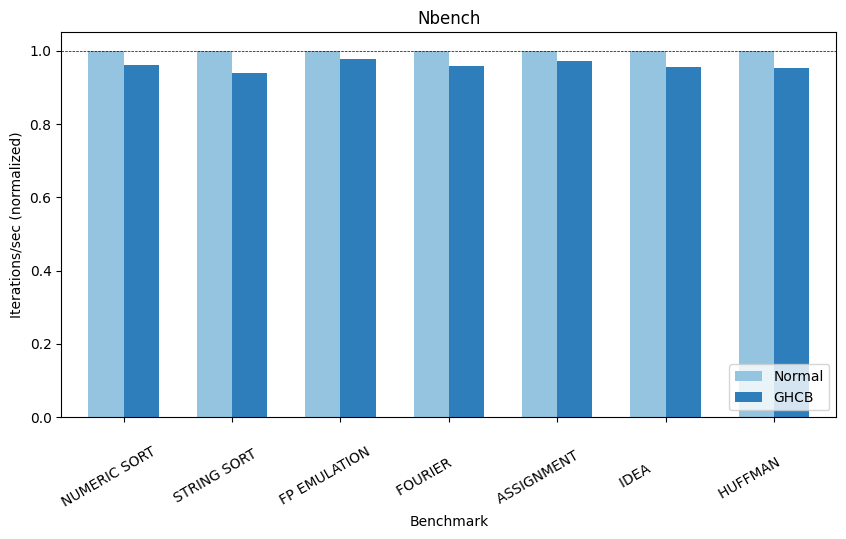

<Figure size 640x480 with 0 Axes>

In [53]:
# set bar width barWidth = 0.25
f = df.plot(x="TEST", y=["Normal", "GHCB"], kind="bar", color=[colors(0.4), colors(0.7)], figsize=(10, 5), width=0.65)
# Change column names to be more descriptive
# plot horizontal line at y=1
plt.axhline(y=1, color='black', linestyle='--', linewidth=0.5)
# xticks labels rotation angle and alignment 30 degree
plt.xticks(rotation=30)
# place legend in the bottom right corner
plt.xlabel("Benchmark")
plt.ylabel("Iterations/sec (normalized)")
plt.title("Nbench")
plt.legend(loc='lower right')
plt.show()
plt.tight_layout()
# save the plot as a pdf
f.get_figure().savefig("nbench-multi.pdf", bbox_inches='tight')

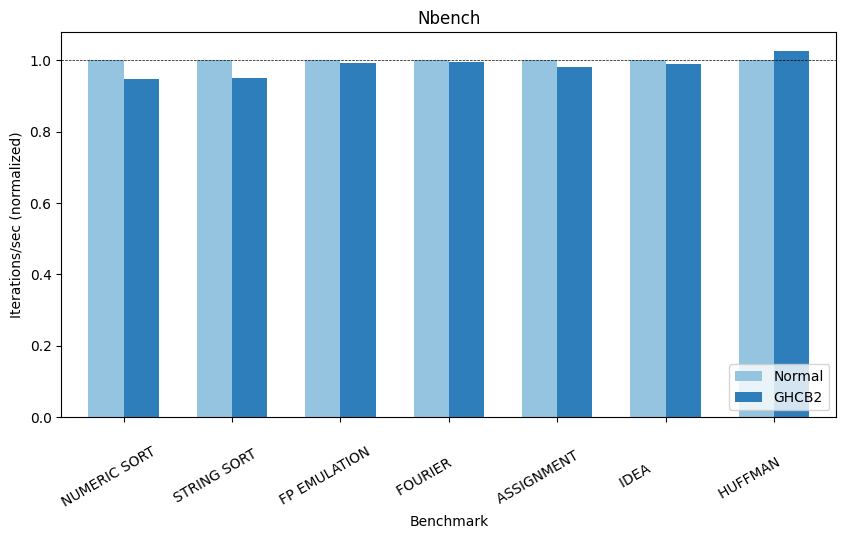

<Figure size 640x480 with 0 Axes>

In [54]:
# set bar width barWidth = 0.25
f = df.plot(x="TEST", y=["Normal", "GHCB2"], kind="bar", color=[colors(0.4), colors(0.7)], figsize=(10, 5), width=0.65)
# Change column names to be more descriptive
# plot horizontal line at y=1
plt.axhline(y=1, color='black', linestyle='--', linewidth=0.5)
# xticks labels rotation angle and alignment 30 degree
plt.xticks(rotation=30)
# place legend in the bottom right corner
plt.xlabel("Benchmark")
plt.ylabel("Iterations/sec (normalized)")
plt.title("Nbench")
plt.legend(loc='lower right')
plt.show()
plt.tight_layout()
# save the plot as a pdf
f.get_figure().savefig("nbench-multi.pdf", bbox_inches='tight')

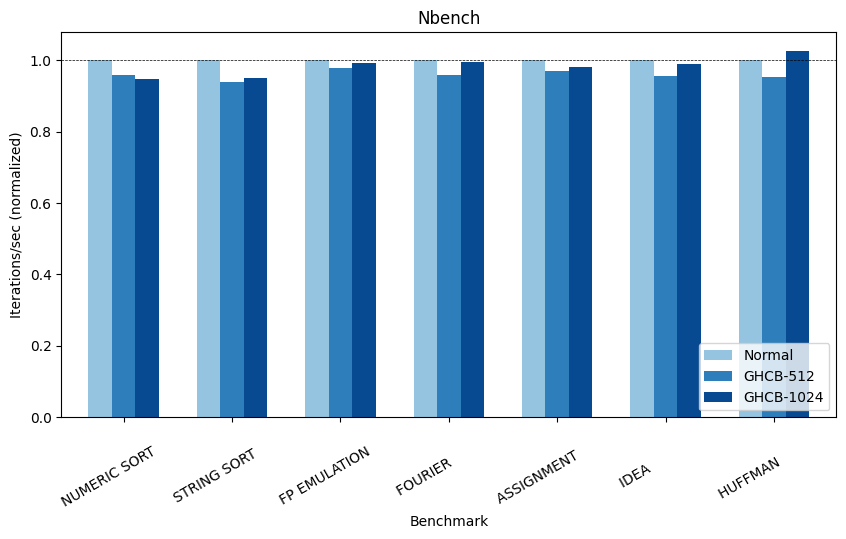

<Figure size 640x480 with 0 Axes>

In [47]:
# Plot unstacked multiple columns such as population and year from DataFrame
df.columns = ['TEST', 'Normal', 'GHCB-512', 'GHCB-1024']
# set bar width barWidth = 0.25
f = df.plot(x="TEST", y=["Normal", "GHCB-512", "GHCB-1024"], kind="bar", color=[colors(0.4), colors(0.7), colors(0.9)], figsize=(10, 5), width=0.65)
# Change column names to be more descriptive
# plot horizontal line at y=1
plt.axhline(y=1, color='black', linestyle='--', linewidth=0.5)
# xticks labels rotation angle and alignment 30 degree
plt.xticks(rotation=30)
# place legend in the bottom right corner
plt.xlabel("Benchmark")
plt.ylabel("Iterations/sec (normalized)")
plt.title("Nbench")
plt.legend(loc='lower right')
plt.show()
plt.tight_layout()
# save the plot as a pdf
f.get_figure().savefig("nbench-multi.pdf", bbox_inches='tight')

In [ ]:
# columns
columns = ['TEST', 'New Index0', 'New Index1']
# Pivot the dataframe so 

def plot_benchmark(df):
    X = df.iloc[:, 0]
    X_axis = np.arange(len(X))
    f = plt.figure(figsize=(10, 5))
    # plot old and new index as a bar chart, with the benchmark as the x-axis
    # and the bar are horizontally stacked
    plt.bar(X_axis-0.2, df.iloc[:, -2], color='r')
    plt.bar(X_axis+0.2, df.iloc[:, -1], color='b')
    # stack horizontally
    plt.legend(['Normal', 'GHCB', 'HotCalls'])
    plt.xlabel('Benchmark')
    plt.ylabel('Run Time')
    plt.title('Benchmark Run Times')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    # Save the figure as a PDF file
    f.savefig("nbench.pdf")